In [178]:
# Critical Curve Separator
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [203]:
data_crit = pd.read_csv('SIE/SIE_POS_crit.dat', header= None, sep="\s+")
data_crit.__dataframe__
df = data_crit.iloc[1:]
pix_size = 0.04
df = df/pix_size

In [204]:
df

,0,1,2,3,4,5,6,7
1,519.12500,505.7500,520.13975,517.68850,519.37500,505.7500,520.14275,517.70700
2,519.37500,505.7500,520.14275,517.70700,519.62500,505.7500,520.14525,517.72075
3,519.62500,505.7500,520.14525,517.72075,519.87500,505.7500,520.14700,517.73000
4,519.87500,505.7500,520.14700,517.73000,520.12500,505.7500,520.14825,517.73450
5,520.12500,505.7500,520.14825,517.73450,520.37500,505.7500,520.14975,517.73425
...,...,...,...,...,...,...,...,...
479,520.23975,518.9705,508.50825,522.94050,520.23975,518.9705,508.26200,522.18275
480,520.23975,518.9705,508.26200,522.18275,520.23975,518.9705,508.07000,521.41225
481,520.23975,518.9705,508.07000,521.41225,520.23975,518.9705,507.93225,520.63225
482,520.23975,518.9705,507.93225,520.63225,520.23975,518.9705,507.84950,519.84500


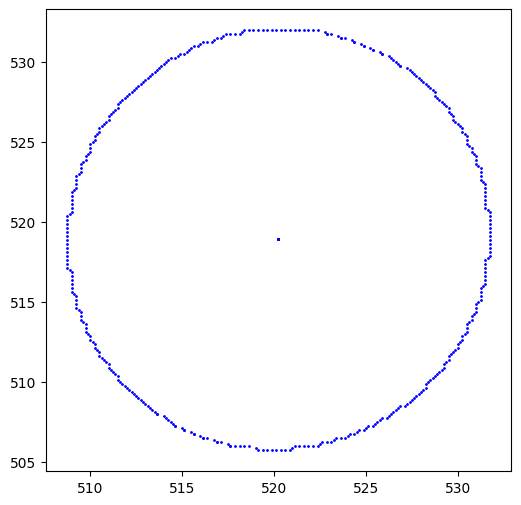

In [205]:
plt.figure(figsize=(6,6))
plt.scatter(df[0], df[1], s=1, color = 'blue', label='Critical Curves')
# plt.scatter(df[2], df[3], s=1, color = 'red', label='Caustics')
# plt.scatter(df[4], df[5], s=1, color = 'blue', label='Critical Curves')
# plt.scatter(df[6], df[7], s=1, color = 'red', label='Caustics')

In [206]:
for i in range(2, len(df)):

    de = df.iloc[:i]

    # Calculate the center of the points
    center_x = de[0].mean()
    center_y = de[1].mean()

    # Calculate the radius as the average distance from the center
    radius = np.sqrt((de[0] - center_x)**2 + (de[1] - center_y)**2).mean()

    # Check if all points are approximately at the same distance from the center
    tolerance = 7
    is_circle = np.all(np.abs(np.sqrt((de[0] - center_x)**2 + (de[1] - center_y)**2) - radius) < tolerance)

    if not is_circle:
        print(f"The first false occurs at index: {i}")
        tan_crit_stop = i - 1
        break

df_tan_crit = df.iloc[:tan_crit_stop]
df_rad_crit = df.iloc[tan_crit_stop:]

The first false occurs at index: 394


In [207]:
for i in range(2, len(df)):

    de = df.iloc[:i]

    # Calculate the center of the points
    center_x = de[2].mean()
    center_y = de[3].mean()

    # Calculate the radius as the average distance from the center
    radius = np.sqrt((de[2] - center_x)**2 + (de[3] - center_y)**2).mean()

    # Check if all points are approximately at the same distance from the center
    tolerance = 7
    is_circle = np.all(np.abs(np.sqrt((de[2] - center_x)**2 + (de[3] - center_y)**2) - radius) < tolerance)

    if not is_circle:
        print(f"The first false occurs at index: {i}")
        tan_caust_stop = i - 1
        break

df_tan_caust = df.iloc[:tan_caust_stop]
df_rad_caust = df.iloc[tan_caust_stop:]

The first false occurs at index: 394


In [208]:
def plot_critical_curve(curve):
    plt.figure(figsize=(6,6))
    if curve == 'tan_crit':
        plt.scatter(df_tan_crit[0], df_tan_crit[1], s=1, color = 'blue', label='Tangential Critical Curve')
    elif curve == 'rad_crit':
        plt.scatter(df_rad_crit[0], df_rad_crit[1], s=1, color = 'blue', label='Radial Critical Curve')
    elif curve == 'tan_caust':
        plt.scatter(df_tan_caust[2], df_tan_caust[3], s=1, color = 'red', label='Tangential Caustic')
    elif curve == 'rad_caust':
        plt.scatter(df_rad_caust[2], df_rad_caust[3], s=1, color = 'red', label='Radial Caustic')

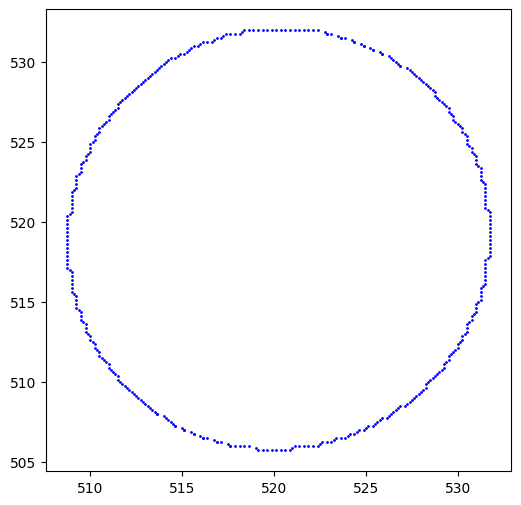

In [210]:
plot_critical_curve('tan_crit')